In [3]:
import ast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import utils as utl

In [110]:
df_games = pd.read_csv('./src/steam_games.csv', index_col=[0])
df_games[df_games.app_name ==  'Warzone']

,publisher,genres,app_name,title,url,release_date,tags,discount_price,reviews_url,specs,price,early_access,id,developer,sentiment,metascore


## Valores Nulos

In [46]:
df_games.isna().sum()

publisher          8071
genres             3283
app_name              2
title              2050
url                   0
release_date       2067
tags                163
discount_price    31910
reviews_url           2
specs               670
price              1377
early_access          0
id                    2
developer          3299
sentiment          7182
metascore         29528
dtype: int64

## Columnas Innecesarias

In [111]:
cols_to_drop = [
  'url',
  'reviews_url',
  'id',
  'discount_price',
  'sentiment',
  'app_name',
  'release_date',
  'title'
]

df_copy = df_games[~df_games['metascore'].isna()].copy()
df_copy = df_copy.drop(cols_to_drop, axis=1)
df_copy

,publisher,genres,tags,specs,price,early_access,developer,metascore
28,Valve,['Action'],"['FPS', 'Classic', 'Action', 'Sci-fi', 'Single...","['Single-player', 'Multi-player', 'Valve Anti-...",9.99,False,Valve,96.0
39,Strategy First,['Strategy'],"['Turn-Based Strategy', 'Strategy', 'Classic',...","['Single-player', 'Multi-player', 'Co-op']",6.99,False,Strategy First,84.0
40,Strategy First,['Strategy'],"['Strategy', 'Turn-Based Strategy', 'Fantasy',...","['Single-player', 'Multi-player', 'Co-op']",6.99,False,Strategy First,80.0
41,Blazing Griffin Ltd.,"['Action', 'Indie', 'RPG']","['Multiplayer', 'Indie', 'Action', 'First-Pers...","['Single-player', 'Multi-player', 'Steam Tradi...",9.99,False,Outerlight Ltd.,76.0
55,Majesco,['Action'],"['Action', 'Sci-fi', 'Story Rich', 'Singleplay...","['Single-player', 'Steam Trading Cards']",9.99,False,GlyphX Games,70.0
...,...,...,...,...,...,...,...,...
32109,Valve,['Action'],"['FPS', 'Action', 'Sci-fi', 'Singleplayer', 'S...",['Single-player'],4.99,False,Gearbox Software,71.0
32112,2K,"['Action', 'Adventure']","['Action', 'Adventure', 'Violent', 'Story Rich...",['Single-player'],14.99,False,Illusion Softworks,88.0
32114,Valve,['Action'],"['FPS', 'World War II', 'Multiplayer', 'Action...","['Multi-player', 'Valve Anti-Cheat enabled']",4.99,False,Valve,79.0
32116,"Epic Games, Inc.",['Action'],"['FPS', 'Arena Shooter', 'Action', 'Classic', ...","['Single-player', 'Multi-player', 'Steam Tradi...",14.99,False,"Epic Games, Inc.",93.0


In [115]:
df_copy.nunique()

publisher        979
genres           200
tags            2493
specs            811
price             48
early_access       2
developer       1595
metascore         70
dtype: int64

In [112]:
df_copy.

,publisher,genres,tags,specs,price,early_access,developer
0,Kotoshiro,"['Action', 'Casual', 'Indie', 'Simulation', 'S...","['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",['Single-player'],4.99,False,Kotoshiro
3,彼岸领域,"['Action', 'Adventure', 'Casual']","['Action', 'Adventure', 'Casual']",['Single-player'],0.99,False,彼岸领域
4,NaN,NaN,"['Action', 'Indie', 'Casual', 'Sports']","['Single-player', 'Full controller support', '...",2.99,False,NaN
5,Trickjump Games Ltd,"['Action', 'Adventure', 'Simulation']","['Action', 'Adventure', 'Simulation', 'FPS', '...","['Single-player', 'Steam Achievements']",3.99,False,Trickjump Games Ltd
6,NaN,"['Free to Play', 'Indie', 'Simulation', 'Sports']","['Free to Play', 'Indie', 'Simulation', 'Sports']","['Single-player', 'Multi-player', 'Online Mult...",9.99,False,Poppermost Productions
...,...,...,...,...,...,...,...
32130,Ghost_RUS Games,"['Casual', 'Indie', 'Simulation', 'Strategy']","['Strategy', 'Indie', 'Casual', 'Simulation']","['Single-player', 'Steam Achievements']",1.99,False,"Nikita ""Ghost_RUS"""
32131,Sacada,"['Casual', 'Indie', 'Strategy']","['Strategy', 'Indie', 'Casual']","['Single-player', 'Steam Achievements', 'Steam...",4.99,False,Sacada
32132,Laush Studio,"['Indie', 'Racing', 'Simulation']","['Indie', 'Simulation', 'Racing']","['Single-player', 'Steam Achievements', 'Steam...",1.99,False,Laush Dmitriy Sergeevich
32133,SIXNAILS,"['Casual', 'Indie']","['Indie', 'Casual', 'Puzzle', 'Singleplayer', ...","['Single-player', 'Steam Achievements', 'Steam...",4.99,False,"xropi,stev3ns"


In [130]:
print(list(df_copy.groupby(['price'])['price'].count().index))
df_copy = df_copy[~df_copy['price'].isna()]
df_copy.isna().sum()

[0, '0.99', '1.0', '1.99', '10.99', '11.99', '12.0', '12.89', '12.99', '13.37', '13.98', '13.99', '14.95', '14.99', '15.0', '15.99', '16.99', '17.99', '18.99', '19.95', '19.99', '2.99', '20.99', '24.99', '26.99', '29.99', '3.99', '34.99', '39.99', '4.68', '4.99', '44.99', '49.99', '5.99', '54.99', '59.95', '59.99', '6.99', '7.49', '7.99', '74.76', '8.99', '87.94', '9.99', '99.99']


publisher       82
genres          61
tags             1
specs            4
price            0
early_access     0
developer       72
metascore        0
dtype: int64

In [140]:
import math
free_game_tags = ['Free to Play', 'Free To Play', 'Free', 'Play for Free!']
df_copy_two = df_copy.copy()
df_copy_two['price'] = df_copy['price'].map(lambda x: 0 if x in free_game_tags  else math.ceil(float(x)))
df_copy_two['price'] = df_copy_two['price'].map(lambda x: x if x % 2 == 0 else (x + 1))
list_items = list(df_copy_two.groupby(['price'])['price'].count().index) 
print(list_items)
print(len(list_items))

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 26, 28, 30, 36, 40, 46, 50, 56, 60, 76, 88, 100]
24


In [18]:
df_copy.dtypes

publisher       object
genres          object
tags            object
specs           object
price           object
early_access      bool
developer       object
dtype: object

## Encoding

Correlacion de Kendalls

In [ ]:
df_corr = df_copy()
df_corr['Hospitalizacion'] = df_corr['Hospitalizacion'].astype('int')
cor = df_corr.corr(method='kendall', numeric_only=True)
sns.heatmap(cor, annot = True)

In [11]:
from ast import literal_eval

def get_list_elements(df, column):
    df = df.copy()
    elements_dict = {}
    
    def read_list(el_list):
        if isinstance(el_list, str):
            for el in list(literal_eval(el_list)):
                if el in elements_dict :
                    elements_dict[el] += 1
                else:
                    elements_dict[el] = 1
            
    df[column].map(lambda x: read_list(x))
    return elements_dict 

response = get_list_elements(df_games, 'specs')
print(list(response))

['Single-player', 'Multi-player', 'Online Multi-Player', 'Cross-Platform Multiplayer', 'Steam Achievements', 'Steam Trading Cards', 'In-App Purchases', 'Stats', 'Full controller support', 'HTC Vive', 'Oculus Rift', 'Tracked Motion Controllers', 'Room-Scale', 'Downloadable Content', 'Steam Cloud', 'Steam Leaderboards', 'Partial Controller Support', 'Seated', 'Standing', 'Local Co-op', 'Shared/Split Screen', 'Valve Anti-Cheat enabled', 'Local Multi-Player', 'Steam Turn Notifications', 'MMO', 'Co-op', 'Online Co-op', 'Captions available', 'Commentary available', 'Steam Workshop', 'Includes level editor', 'Mods', 'Mods (require HL2)', 'Game demo', 'Includes Source SDK', 'SteamVR Collectibles', 'Keyboard / Mouse', 'Gamepad', 'Windows Mixed Reality', 'Mods (require HL1)']


['Single-player', 'Multi-player', 'Online Multi-Player', 'Cross-Platform Multiplayer', 'Steam Achievements', 'Steam Trading Cards', 'In-App Purchases', 'Stats', 'Full controller support', 'HTC Vive', 'Oculus Rift', 'Tracked Motion Controllers', 'Room-Scale', 'Downloadable Content', 'Steam Cloud', 'Steam Leaderboards', 'Partial Controller Support', 'Seated', 'Standing', 'Local Co-op', 'Shared/Split Screen', 'Valve Anti-Cheat enabled', 'Local Multi-Player', 'Steam Turn Notifications', 'MMO', 'Co-op', 'Online Co-op', 'Captions available', 'Commentary available', 'Steam Workshop', 'Includes level editor', 'Mods', 'Mods (require HL2)', 'Game demo', 'Includes Source SDK', 'SteamVR Collectibles', 'Keyboard / Mouse', 'Gamepad', 'Windows Mixed Reality', 'Mods (require HL1)']


In [12]:
response = get_list_elements(df_games, 'genres')

print(list(response))

['Action', 'Casual', 'Indie', 'Simulation', 'Strategy', 'Free to Play', 'RPG', 'Sports', 'Adventure', 'Racing', 'Early Access', 'Massively Multiplayer', 'Animation &amp; Modeling', 'Video Production', 'Utilities', 'Web Publishing', 'Education', 'Software Training', 'Design &amp; Illustration', 'Audio Production', 'Photo Editing', 'Accounting']


In [14]:
df_copy_two  = df_copy.copy()
print(df_copy_two)

def element_in_list(list_str, tag):
    if isinstance(list_str, str):
        list_str = list(literal_eval(list_str))
        if tag in list_str :
            return 1 
        else:
            return 0 
    else:
        return 0 

def tag_to_hot_encoding(df, column, tag):
    
    df[tag] = df[column].map(lambda el_list: element_in_list(el_list, tag))

# 1 if tag in el_list else 0
tag_to_hot_encoding(df_copy_two, 'specs', 'Multi-player')
df_copy_two.head(5)


                  publisher                      genres  \
28                    Valve                  ['Action']   
39           Strategy First                ['Strategy']   
40           Strategy First                ['Strategy']   
41     Blazing Griffin Ltd.  ['Action', 'Indie', 'RPG']   
55                  Majesco                  ['Action']   
...                     ...                         ...   
32109                 Valve                  ['Action']   
32112                    2K     ['Action', 'Adventure']   
32114                 Valve                  ['Action']   
32116      Epic Games, Inc.                  ['Action']   
32117                 Valve                  ['Action']   

                                                    tags  \
28     ['FPS', 'Classic', 'Action', 'Sci-fi', 'Single...   
39     ['Turn-Based Strategy', 'Strategy', 'Classic',...   
40     ['Strategy', 'Turn-Based Strategy', 'Fantasy',...   
41     ['Multiplayer', 'Indie', 'Action', 'First-Pe

,publisher,genres,tags,specs,price,early_access,developer,metascore,Multi-player
28,Valve,['Action'],"['FPS', 'Classic', 'Action', 'Sci-fi', 'Single...","['Single-player', 'Multi-player', 'Valve Anti-...",9.99,False,Valve,96.0,1
39,Strategy First,['Strategy'],"['Turn-Based Strategy', 'Strategy', 'Classic',...","['Single-player', 'Multi-player', 'Co-op']",6.99,False,Strategy First,84.0,1
40,Strategy First,['Strategy'],"['Strategy', 'Turn-Based Strategy', 'Fantasy',...","['Single-player', 'Multi-player', 'Co-op']",6.99,False,Strategy First,80.0,1
41,Blazing Griffin Ltd.,"['Action', 'Indie', 'RPG']","['Multiplayer', 'Indie', 'Action', 'First-Pers...","['Single-player', 'Multi-player', 'Steam Tradi...",9.99,False,Outerlight Ltd.,76.0,1
55,Majesco,['Action'],"['Action', 'Sci-fi', 'Story Rich', 'Singleplay...","['Single-player', 'Steam Trading Cards']",9.99,False,GlyphX Games,70.0,0


In [76]:
from ast import literal_eval

response = get_list_elements(df_copy, 'specs')
tags = list(response)

for tag in tags:
    tag_to_hot_encoding(df_copy, 'specs', tag)

/tmp/ipykernel_5448/1153530558.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[tag] = df[column].map(lambda el_list: element_in_list(el_list, tag))
/tmp/ipykernel_5448/1153530558.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[tag] = df[column].map(lambda el_list: element_in_list(el_list, tag))
/tmp/ipykernel_5448/1153530558.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

In [65]:
response = get_list_elements(df_copy, 'genres')
tags = list(response)

for tag in tags:
    tag_to_hot_encoding(df_copy, 'genres', tag)

/tmp/ipykernel_5448/1153530558.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[tag] = df[column].map(lambda el_list: element_in_list(el_list, tag))
/tmp/ipykernel_5448/1153530558.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[tag] = df[column].map(lambda el_list: element_in_list(el_list, tag))
/tmp/ipykernel_5448/1153530558.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

In [141]:
df_copy_two

,publisher,genres,tags,specs,price,early_access,developer,metascore
28,Valve,['Action'],"['FPS', 'Classic', 'Action', 'Sci-fi', 'Single...","['Single-player', 'Multi-player', 'Valve Anti-...",10,False,Valve,96.0
39,Strategy First,['Strategy'],"['Turn-Based Strategy', 'Strategy', 'Classic',...","['Single-player', 'Multi-player', 'Co-op']",8,False,Strategy First,84.0
40,Strategy First,['Strategy'],"['Strategy', 'Turn-Based Strategy', 'Fantasy',...","['Single-player', 'Multi-player', 'Co-op']",8,False,Strategy First,80.0
41,Blazing Griffin Ltd.,"['Action', 'Indie', 'RPG']","['Multiplayer', 'Indie', 'Action', 'First-Pers...","['Single-player', 'Multi-player', 'Steam Tradi...",10,False,Outerlight Ltd.,76.0
55,Majesco,['Action'],"['Action', 'Sci-fi', 'Story Rich', 'Singleplay...","['Single-player', 'Steam Trading Cards']",10,False,GlyphX Games,70.0
...,...,...,...,...,...,...,...,...
32109,Valve,['Action'],"['FPS', 'Action', 'Sci-fi', 'Singleplayer', 'S...",['Single-player'],6,False,Gearbox Software,71.0
32112,2K,"['Action', 'Adventure']","['Action', 'Adventure', 'Violent', 'Story Rich...",['Single-player'],16,False,Illusion Softworks,88.0
32114,Valve,['Action'],"['FPS', 'World War II', 'Multiplayer', 'Action...","['Multi-player', 'Valve Anti-Cheat enabled']",6,False,Valve,79.0
32116,"Epic Games, Inc.",['Action'],"['FPS', 'Arena Shooter', 'Action', 'Classic', ...","['Single-player', 'Multi-player', 'Steam Tradi...",16,False,"Epic Games, Inc.",93.0


In [144]:
prices = [10,20,16,6,8,30,0,4,40,14,26,60,12,2,50]

df_test = df_copy_two[df_copy_two['price'].isin(prices)]
print(df_copy_two.shape)
df_copy_two.groupby('price')['price'].agg(['count']).sort_values(by='count', ascending=False).head(20)


(2584, 8)


,count
price,
10,708
20,455
16,391
6,279
8,146
30,120
0,79
4,66
40,66


In [146]:
df_test.shape

(2544, 8)

In [196]:
df_copy.isna().sum()

publisher       85
genres          62
tags             1
specs            4
price           23
early_access     0
developer       75
metascore        0
dtype: int64

In [143]:
tags_to_hot_encoding = ['Downloadable Content','In-App Purchases', 'Cross-Platform Multiplayer']

for tag in tags_to_hot_encoding:
    tag_to_hot_encoding(df_test, 'specs', tag)

In [144]:
tags_to_hot_encoding = ['Free to Play','Indie', 'Action', 'Casual']

for tag in tags_to_hot_encoding:
    tag_to_hot_encoding(df_copy, 'genres', tag)

In [145]:
df_copy_two

,publisher,genres,tags,specs,price,early_access,developer,Multi-player,Downloadable Content,In-App Purchases,Cross-Platform Multiplayer,Free to Play,Indie,Action,Casual
0,Kotoshiro,"['Action', 'Casual', 'Indie', 'Simulation', 'S...","['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",['Single-player'],4.99,False,Kotoshiro,0,0,0,0,0,1,1,1
1,"Making Fun, Inc.","['Free to Play', 'Indie', 'RPG', 'Strategy']","['Free to Play', 'Strategy', 'Indie', 'RPG', '...","['Single-player', 'Multi-player', 'Online Mult...",0.00,False,Secret Level SRL,1,0,1,1,1,1,0,0
2,Poolians.com,"['Casual', 'Free to Play', 'Indie', 'Simulatio...","['Free to Play', 'Simulation', 'Sports', 'Casu...","['Single-player', 'Multi-player', 'Online Mult...",0.00,False,Poolians.com,1,0,1,0,1,1,0,1
3,彼岸领域,"['Action', 'Adventure', 'Casual']","['Action', 'Adventure', 'Casual']",['Single-player'],0.99,False,彼岸领域,0,0,0,0,0,0,1,1
4,NaN,NaN,"['Action', 'Indie', 'Casual', 'Sports']","['Single-player', 'Full controller support', '...",2.99,False,NaN,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32130,Ghost_RUS Games,"['Casual', 'Indie', 'Simulation', 'Strategy']","['Strategy', 'Indie', 'Casual', 'Simulation']","['Single-player', 'Steam Achievements']",1.99,False,"Nikita ""Ghost_RUS""",0,0,0,0,0,1,0,1
32131,Sacada,"['Casual', 'Indie', 'Strategy']","['Strategy', 'Indie', 'Casual']","['Single-player', 'Steam Achievements', 'Steam...",4.99,False,Sacada,0,0,0,0,0,1,0,1
32132,Laush Studio,"['Indie', 'Racing', 'Simulation']","['Indie', 'Simulation', 'Racing']","['Single-player', 'Steam Achievements', 'Steam...",1.99,False,Laush Dmitriy Sergeevich,0,0,0,0,0,1,0,0
32133,SIXNAILS,"['Casual', 'Indie']","['Indie', 'Casual', 'Puzzle', 'Singleplayer', ...","['Single-player', 'Steam Achievements', 'Steam...",4.99,False,"xropi,stev3ns",0,0,0,0,0,1,0,1


In [ ]:
categorical_cols = ['early_access', 'Free to Play','Indie', 'Action', 'Casual', 'Multi-player', 'Downloadable Content','In-App Purchases', 'Cross-Platform Multiplayer']
utl.label_encode_columns(df_test, categorical_cols)

In [67]:
utl.label_encode_columns(df_copy, ['price'])

/home/rickhersd2002/projects/Steam_games_API_services/utils.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])


{'price': {0.99: 0,
  1.99: 1,
  2.99: 2,
  3.99: 3,
  4.99: 4,
  6.99: 5,
  7.99: 6,
  9.99: 7,
  14.99: 8,
  19.99: 9,
  29.99: 10,
  39.99: 11,
  49.99: 12,
  59.99: 13}}

In [42]:
categorical_cols = ['Simulation', 'Strategy', 'RPG', 'Sports', 'Adventure', 'Racing', 'Massively Multiplayer', 'Animation &amp; Modeling', 'Video Production', 'Utilities', 'Web Publishing', 'Education', 'Software Training', 'Design &amp; Illustration', 'Audio Production', 'Photo Editing', 'Accounting']

for tag in categorical_cols:
    tag_to_hot_encoding(df_test, 'genres', tag)


NameError: name 'df_test' is not defined

<Axes: >

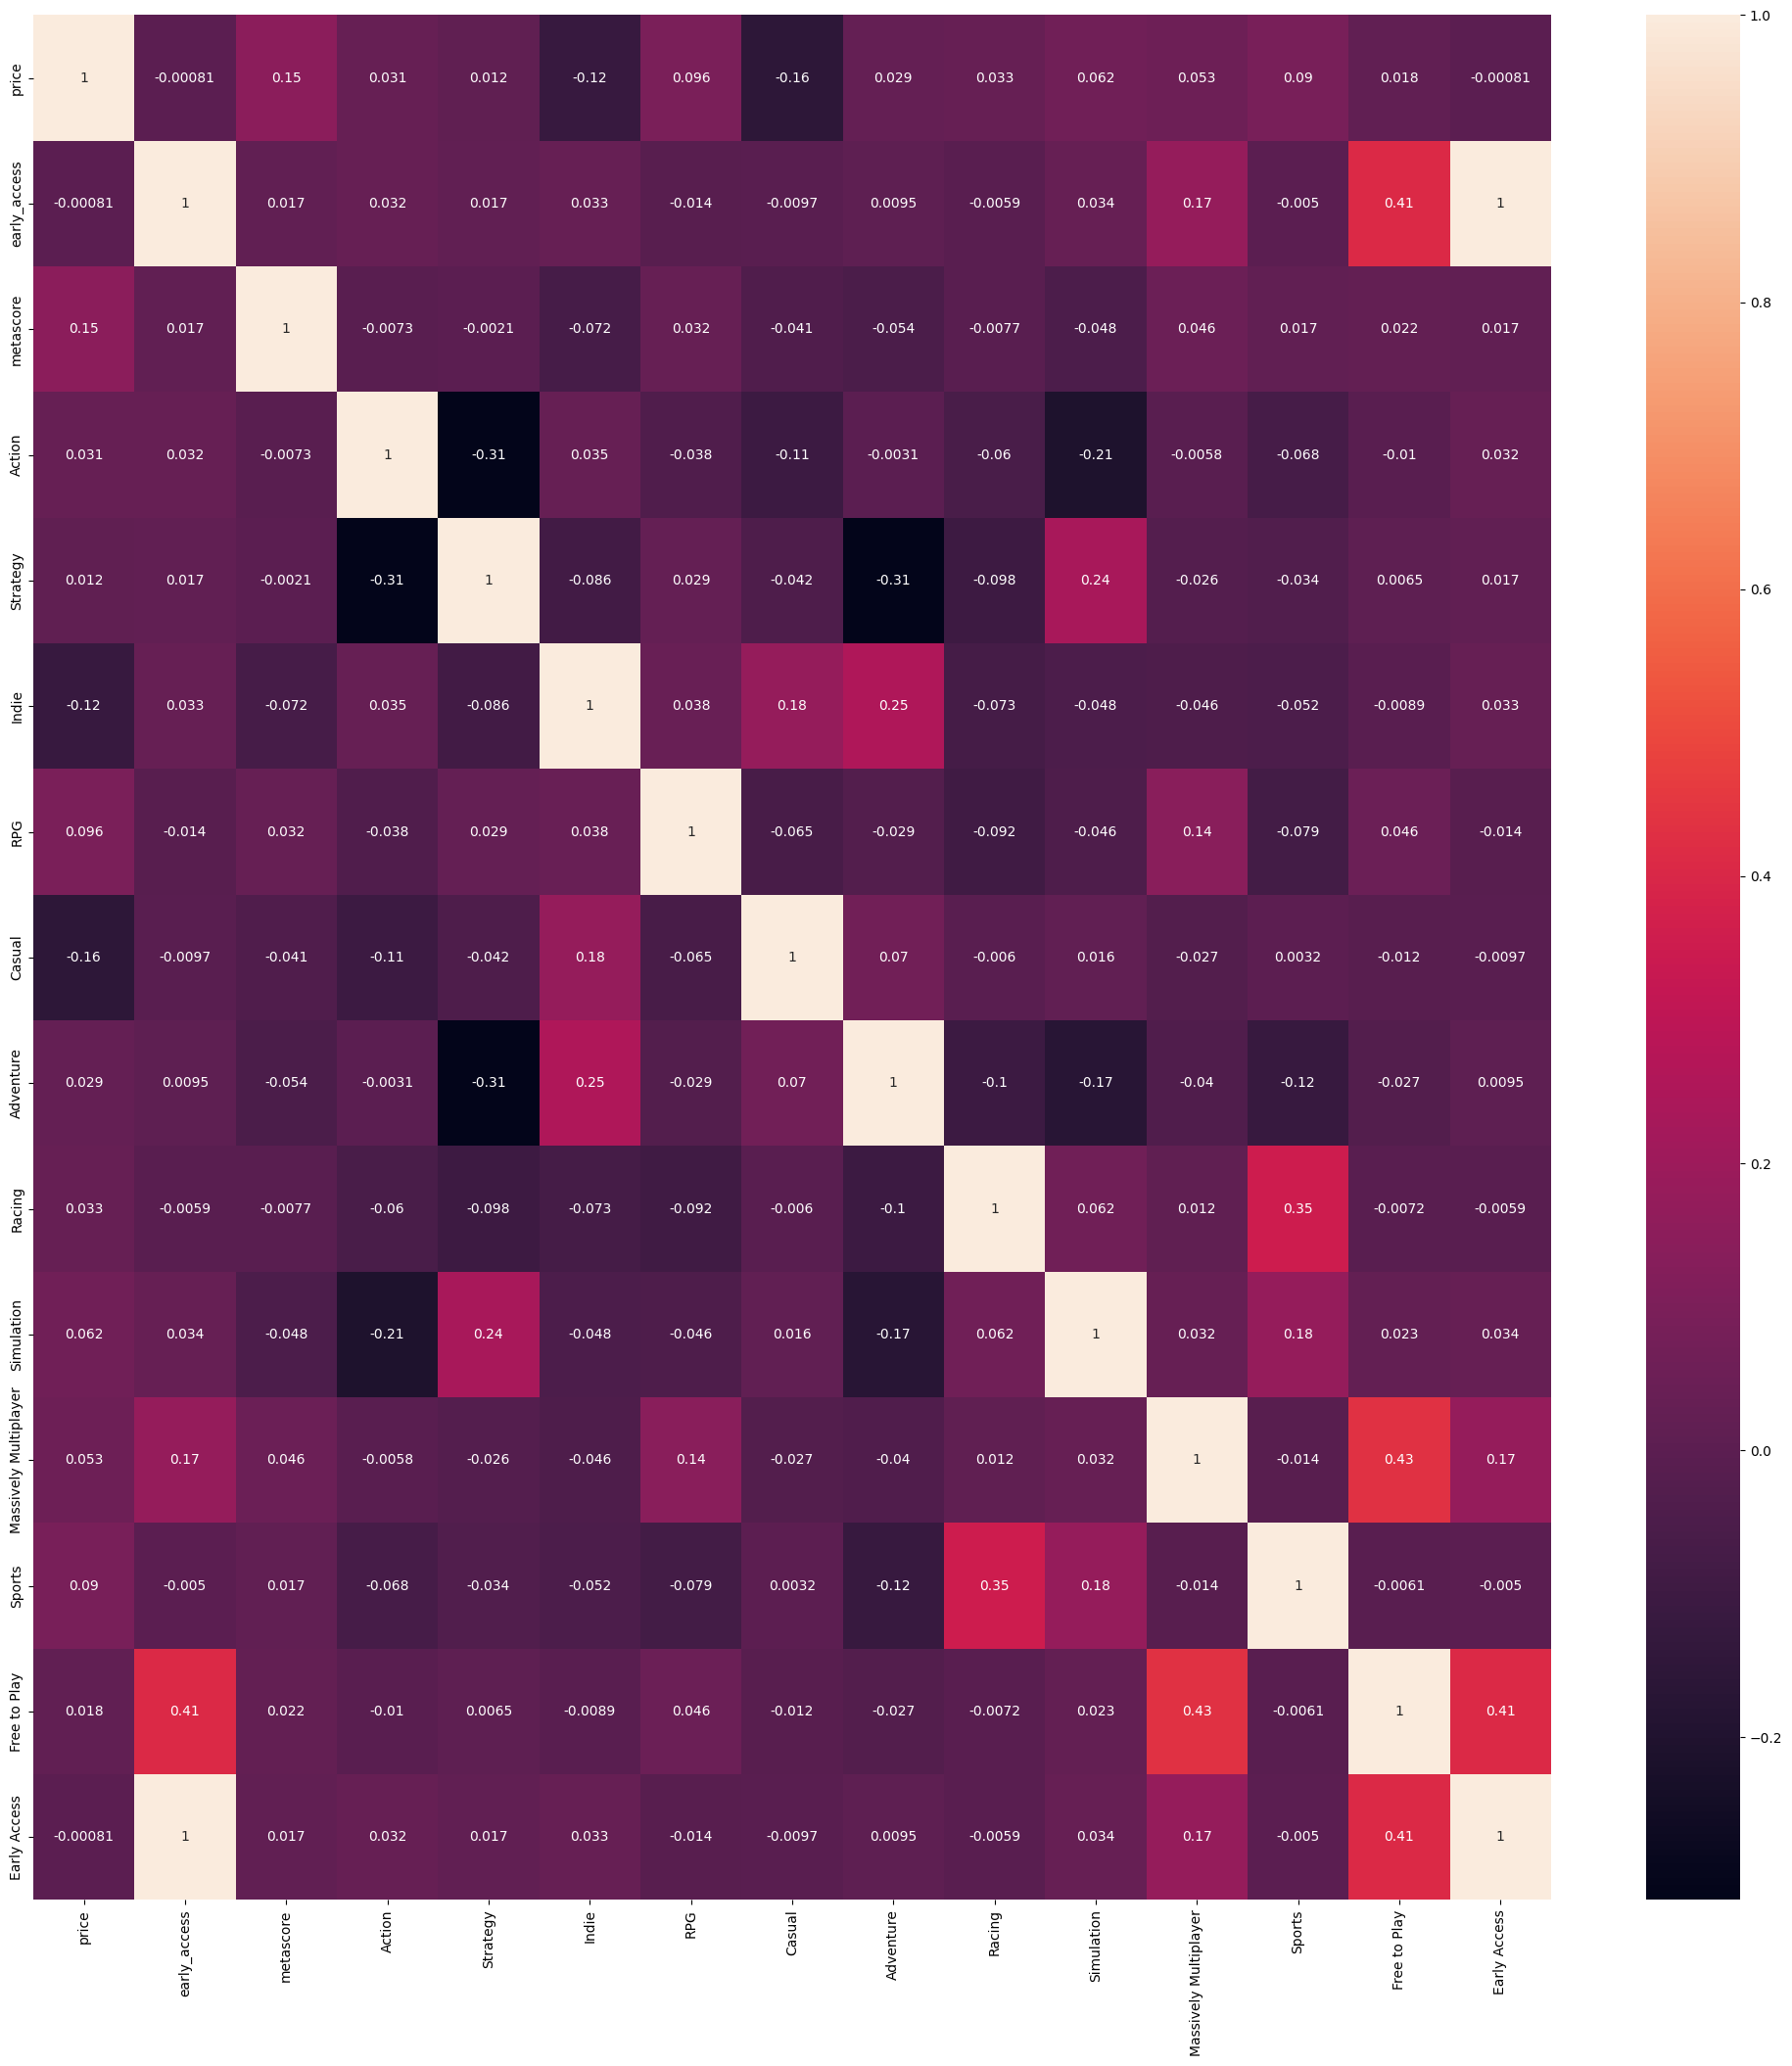

In [68]:
plt.figure(figsize =(25, 25))
corr = df_copy.corr(method='kendall', numeric_only=True)
sns.heatmap(corr, annot = True)

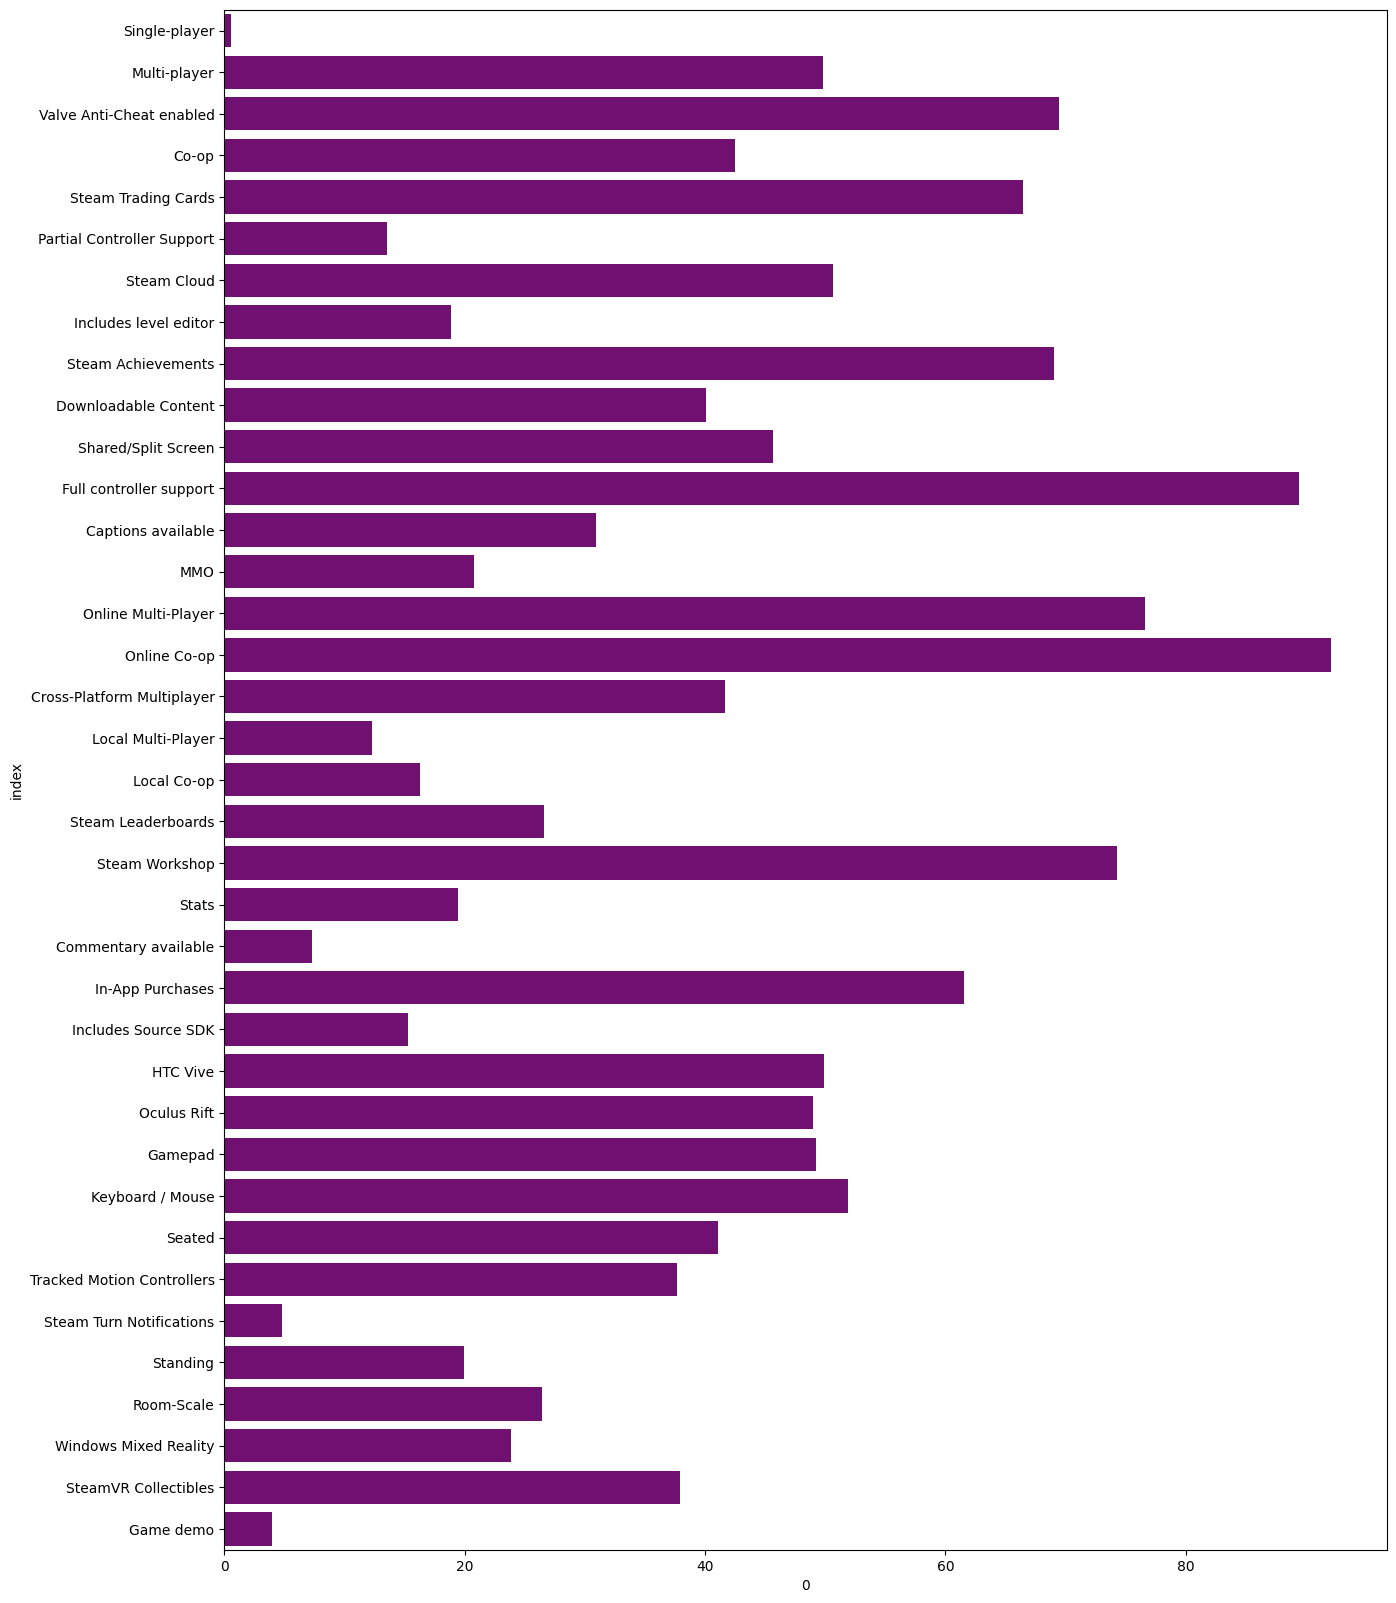

In [78]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

response = get_list_elements(df_copy, 'specs')
tags = list(response)
X = df_copy[tags]
y = df_copy['price']

select = SelectKBest(score_func=chi2, k=6)
fit = select.fit(X, y)

X_new = select.fit_transform(X, y)

s = pd.Series(data=fit.scores_,index=X.columns).reset_index()
plt.figure(figsize= (15,20))
sns.barplot(data=s, y='index', x=0, orient='h', color="purple")
filter = select.get_support()
features = np.array(X.columns)

In [105]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


response = get_list_elements(df_copy, 'genres')
tags = list(response)

X = df_copy[['Sports', 'Casual', 'Indie', 'Free to Play', 'Full controller support', 'In-App Purchases', 'Steam Workshop', 'Online Co-op', 'Steam Achievements']]
y = df_copy['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)



In [106]:
for x in [100, 150, 200, 250, 300]:
    regr = RandomForestClassifier(random_state=42, n_estimators=x, criterion='gini')
    regr.fit(X_train, y_train)
    print(regr.score(X_test, y_test))

0.3578231292517007
0.3619047619047619
0.36462585034013606
0.35918367346938773
0.35918367346938773


In [107]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state= 42)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.3510204081632653

In [108]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.3142857142857143